In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y=df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# удаляем из dataframe метку Outcome
df.drop('Outcome', axis='columns', inplace=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# подготавливаем X
X = df.values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#линейное ядро
model = SVC(kernel='linear', C=5.0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7783985102420856

In [ ]:
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8051948051948052

In [ ]:
#полиномиальное ядро
model = SVC(kernel='poly', C=5.0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7877094972067039

In [ ]:
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8008658008658008

In [ ]:
#гауссово ядро
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7802607076350093

In [ ]:
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.7359307359307359

In [ ]:
#сигмоидное ядро
model = SVC(kernel='sigmoid', C=1.0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.48789571694599626

In [ ]:
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.5497835497835498

###descision tree###

In [ ]:
#descision tree
# импортируем библиотеки
import pandas as pd
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
df2 = pd.read_csv("diabetes.csv")

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y=df2['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# подготавливаем X
df2.drop('Outcome', axis='columns', inplace=True)
X = df2.values
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# определяем дерево решений gini index
dt_classifier = DecisionTreeClassifier(criterion = 'gini')
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [ ]:
dt_classifier.score(X,y)

1.0

In [ ]:
# функция для отрисовки результатов
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
def tree_graph_to_pdf(tree, feature_names, pdf_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_pdf(pdf_file_to_save)

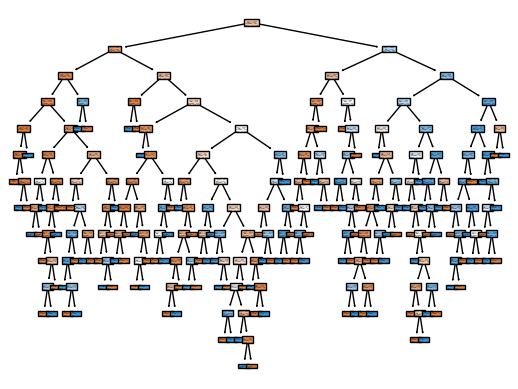

In [ ]:
# рисуем как есть
plt.figure()
plot_tree(dt_classifier, filled=True)
plt.show()

# адаптируем под вывод
tree_graph_to_png(dt_classifier, feature_names=df2.columns[:],
                  png_file_to_save='gini.png')

In [ ]:
# Сохранение дерева решений в формате PDF
tree_graph_to_pdf(dt_classifier, feature_names=df2.columns[:], pdf_file_to_save='gini.pdf')

In [ ]:
####entropy
# определяем дерево решений entropy
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(X, y)
dt_classifier.score(X,y)

1.0

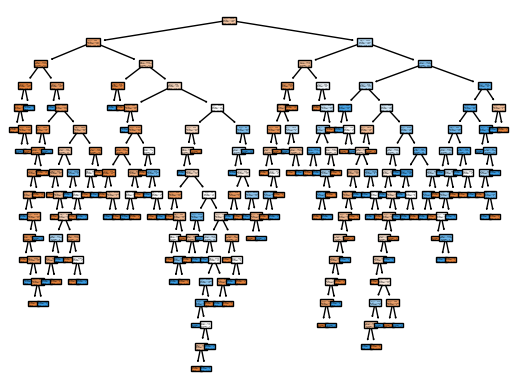

In [ ]:
# рисуем как есть
plt.figure()
plot_tree(dt_classifier, filled=True)
plt.show()

# адаптируем под вывод
tree_graph_to_png(dt_classifier, feature_names=df2.columns[:],
                  png_file_to_save='entropy.png')

In [ ]:
# Сохранение дерева решений в формате PDF
tree_graph_to_pdf(dt_classifier, feature_names=df2.columns[:], pdf_file_to_save='entropy.pdf')

In [ ]:
####log_loss
# определяем дерево решений log_loss
dt_classifier = DecisionTreeClassifier(criterion = 'log_loss')
dt_classifier.fit(X, y)
dt_classifier.score(X,y)

1.0

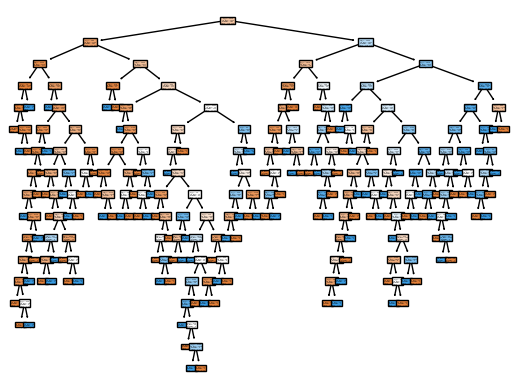

In [ ]:
# рисуем как есть
plt.figure()
plot_tree(dt_classifier, filled=True)
plt.show()

# адаптируем под вывод
tree_graph_to_png(dt_classifier, feature_names=df2.columns[:],
                  png_file_to_save='log_loss.png')

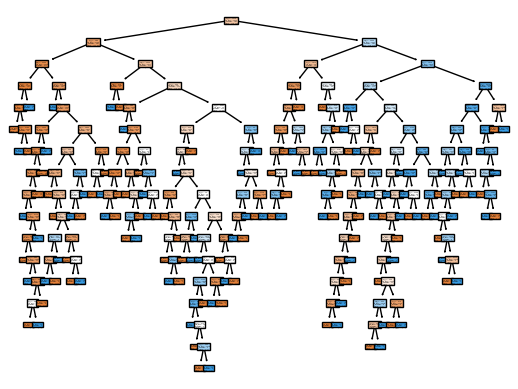

In [ ]:
# Сохранение дерева решений в формате PDF
tree_graph_to_pdf(dt_classifier, feature_names=df2.columns[:], pdf_file_to_save='log_loss.pdf')